# Wine Dataset

We will first import some useful Python libraries like Pandas, Seaborn, Matplotlib and SKlearn for performing complex computational tasks. 

In [359]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Importing Dataset

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines

In [360]:
df = load_wine(as_frame=True).frame
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Because we are doing here the unsupervised learning, we remove the target column from our dataset.

In [361]:
X = df.drop(columns=['target'])

In [362]:
# Check the data informations
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [363]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## Scale the Data

Data is scaled using sklearn's `StandardScaler()` 

In [364]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

(Optional) To see if the data is scaled, we convert the features to a dataframe.

In [365]:
# Convert to pandas Dataframe
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)
# Print the scaled data
X_scaled_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## Apply Dimensionality Reduction Technique PCA

Principal Component Analysis is a technique that transforms high-dimensions data into lower-dimension while retaining as much information as possible.

It is used to interpret and visualize data. 
The number of variables decreases, which simplifies further analysis.

Here, we minimize the dataset from 13 features to 2 features.

In [366]:
pca = PCA(n_components=2)

X_reduced = pca.fit_transform(X_scaled)

We can then view the PCA components, i.e. the principal axes in the feature space, which represent the directions of maximum variance in the dataset. These components are sorted by explained_variance.

In [367]:
explained_variance = pca.explained_variance_ratio_

PC1_explainedvariance = explained_variance[0]
print("Explained variance of PC1", PC1_explainedvariance)

PC2_explainedvariance = explained_variance[1]
print("Explained variance of PC2", PC2_explainedvariance)

Explained variance of PC1 0.3619884809992633
Explained variance of PC2 0.1920749025700894


We can use a bar graph to plot the explained variances of each principal component.

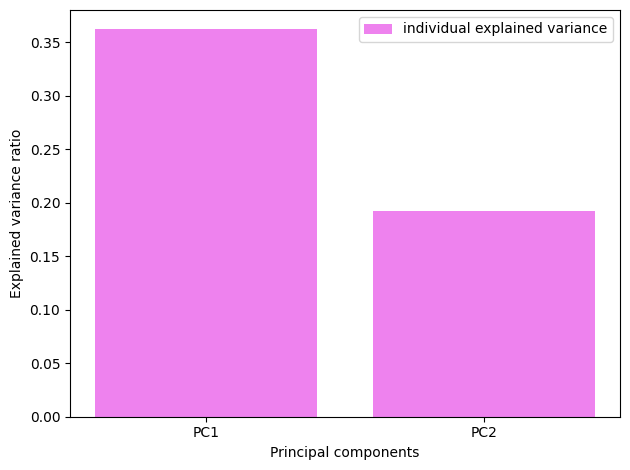

In [368]:
plt.figure()
principalcomponents = ['PC1', 'PC2']

plt.bar(principalcomponents, explained_variance, label='individual explained variance', color='violet')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

We can now plot our data in two dimensions to visualize clusters if there are any.

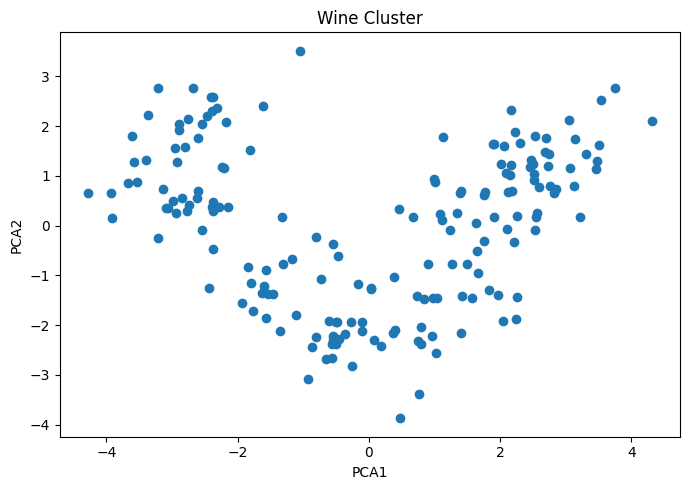

In [369]:
plt.figure(figsize=(7,5))

# Scatter plot
plt.scatter(X_reduced[:,0],X_reduced[:,1])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()

## Perform clustering using KMeans

We can perform a clustering algorithm like KMeans to determine the number of clusters in our dataset.

The elbow method is used to determine the number of clusters

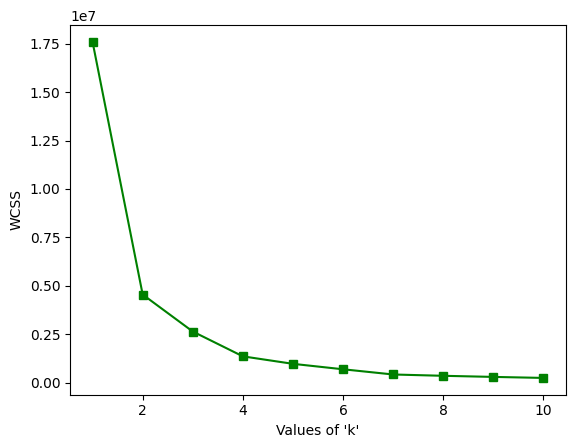

In [370]:
wcss = {} 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss[i] = kmeans.inertia_
    
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

As we can see from the above graph that there is turning like an elbow at k = 3. So, we can say that the right number of cluster for the given datasets is 3.

Let's perform the K-Means clustering for `n_clusters=3`.

In [ ]:
kmeans = KMeans(n_clusters=3)

# Use X_scaled 
kmeans.fit(X_scaled)

KMeans(n_clusters=3)

For each cluster, there are values of cluster centers according to the number of columns present in the data.

In [372]:
kmeans.cluster_centers_

array([[ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529]])

`labels_` indicates the index of the cluster each sample belongs to.

In [373]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

We reduce the cluster centers using PCA.

In [374]:
centers = pca.transform(kmeans.cluster_centers_)

# reduced centers
centers

array([[-2.72003575,  1.12565126],
       [-0.03695661, -1.77223945],
       [ 2.2761936 ,  0.93205403]])

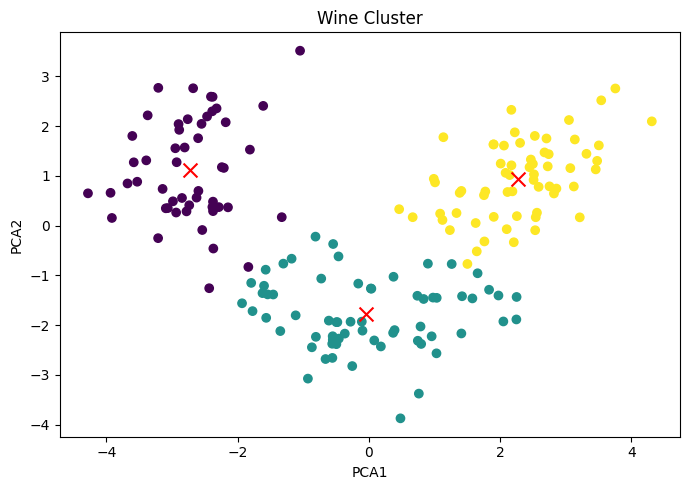

In [375]:
plt.figure(figsize=(7,5))

# Scatter plot
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()

## Display the loading score of each feature

We can use a heatmap to check the influence of each feature on PCA components

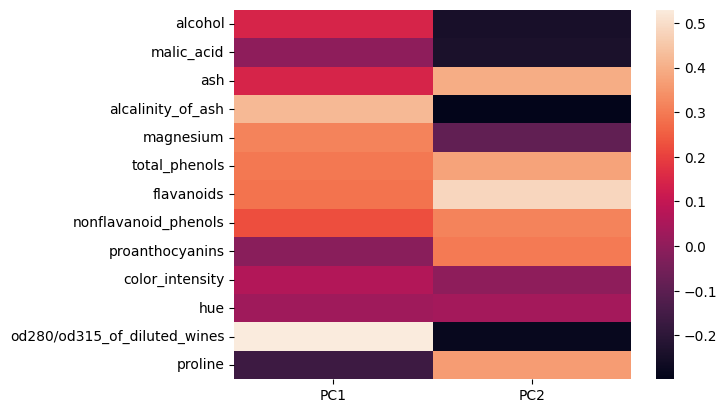

In [392]:
component_df = pd.DataFrame(pca.components_.reshape(13,2), columns=['PC1', 'PC2'], index=df.columns.drop('target'))

# Heat map
sns.heatmap(component_df)
plt.show()